# Proyek Analisis Data: Bike Sharing Dataset(day)
- **Nama:** Galih Rashif Husaini
- **Email:** galih.rashif@gmail.com
- **ID Dicoding:** B25B9D054

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda pada tahun 2012?
- Bagaimana demografi pelanggan casual dan registered(terdaftar) pada peminjaman sepeda ini?
- Apakah temperature(suhu) dan humidity(kelembapan) mempengaruhi peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [51]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [52]:
bike_day_df = pd.read_csv("https://raw.githubusercontent.com/galihr/Bike-sharing-dataset/refs/heads/main/day.csv")
bike_day_df.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Pengguna registered(terdaftar) banyak menggunakan penyewaan sepeda pada workingday(hari Kerja)

### Assessing Data

In [53]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [54]:
bike_day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [55]:
print("Jumlah duplikasi: ", bike_day_df.duplicated().sum())

Jumlah duplikasi:  0


In [56]:
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- dataset bike sharing ini tidak terdapat missing value pada tiap kolom nya
- dataset bike sharing ini juga tidak ada duplikasi

### Cleaning Data

In [57]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  bike_day_df[column] = pd.to_datetime(bike_day_df[column])

In [58]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- membersihkan data bike_day_df dengan mengatasi kesalahan tipe data untuk kolom dteday. dari  tipe data object menjadi tipe data datetime

## Exploratory Data Analysis (EDA)

### Explore bike_day_df

In [59]:
bike_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [60]:
# Melihat rata-rata peminjaman sepeda per bulan pada tahun 2012
bike_day_df[bike_day_df["yr"] == 1].groupby(by=["mnth"]).agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
})


,cnt,casual,registered
mnth,,,
1,3120.774194,289.322581,2831.451613
2,3556.448276,300.724138,3255.724138
3,5318.548387,1019.935484,4298.612903
4,5807.466667,1281.866667,4525.600000
5,6318.225806,1426.935484,4891.290323
6,6761.000000,1443.133333,5317.866667
7,6567.967742,1345.322581,5222.645161
8,6919.451613,1393.451613,5526.000000
9,7285.766667,1459.266667,5826.500000


In [61]:
# Melihat total dan rata-rata peminjaman antara pengguna casual dan registered
bike_day_df.agg({
    "casual": ["mean", "sum"],
    "registered": ["mean", "sum"]
})


,casual,registered
mean,848.176471,3.656172e+03
sum,620017.000000,2.672662e+06


In [62]:
# melihat data jumlah data pada masing masing kondisi cuaca
bike_day_df["weathersit"].value_counts()


,count
weathersit,
1,463
2,247
3,21


In [63]:
# Melihat rata-rata peminjaman berdasarkan kondisi cuaca
bike_day_df.groupby(by=["weathersit"]).agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
})


,cnt,casual,registered
weathersit,,,
1,4876.786177,964.030238,3912.755940
2,4035.862348,687.352227,3348.510121
3,1803.285714,185.476190,1617.809524


In [64]:
# Membuat kelompok suhu (dibagi menjadi 4 interval)
bike_day_df["temp_rent"] = pd.cut(bike_day_df["temp"], bins=4)

# Melihat rata-rata peminjaman pada tiap kelompok suhu
bike_day_df.groupby("temp_rent", observed=True).agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
})

,cnt,casual,registered
temp_rent,,,
"(0.0583, 0.26]",1819.698630,154.013699,1665.684932
"(0.26, 0.46]",3596.723735,538.649805,3058.073930
"(0.46, 0.661]",5547.671053,1103.973684,4443.697368
"(0.661, 0.862]",5610.485549,1263.786127,4346.699422


In [65]:
# Membuat kelompok kelembaban (dibagi menjadi 4 interval)
bike_day_df["hum_rent"] = pd.cut(bike_day_df["hum"], bins=4)

# Melihat rata-rata peminjaman pada tiap kelompok kelembaban
bike_day_df.groupby("hum_rent", observed=True).agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
})

,cnt,casual,registered
hum_rent,,,
"(-0.000973, 0.243]",1129.000000,289.000000,840.000000
"(0.243, 0.486]",4269.672414,830.818966,3438.853448
"(0.486, 0.729]",4859.776995,912.086854,3947.690141
"(0.729, 0.972]",3876.331551,719.331551,3157.000000


**Insight:**
- pada pertengahan bulan adalah bulan bulan yang paling banyak dilakukan peminjaman sepeda
- pelanggan registered merupakan pelanggan yang paling banyak melakukan peminjaman sepeda
- berdasarkan cuaca, cuaca cerah adalah cuaca yang paling banyak dilakukan peminjaman sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda pada tahun 2012?

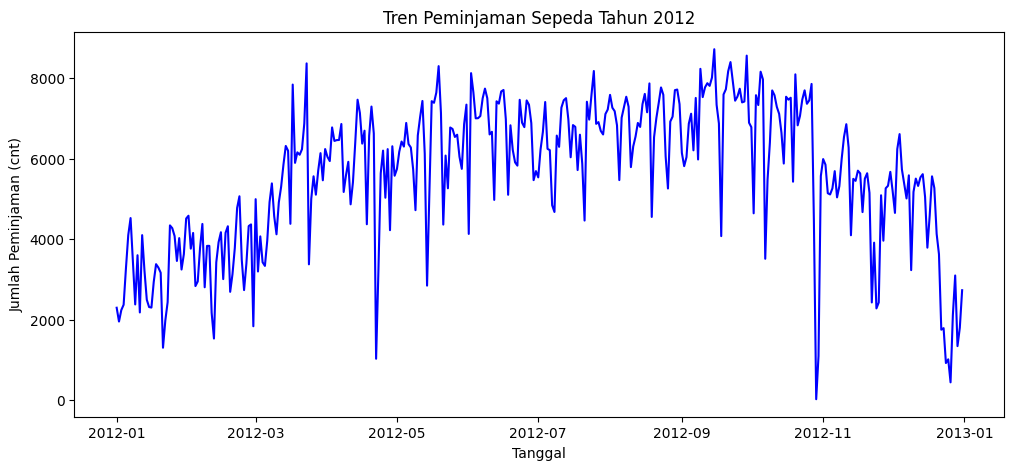

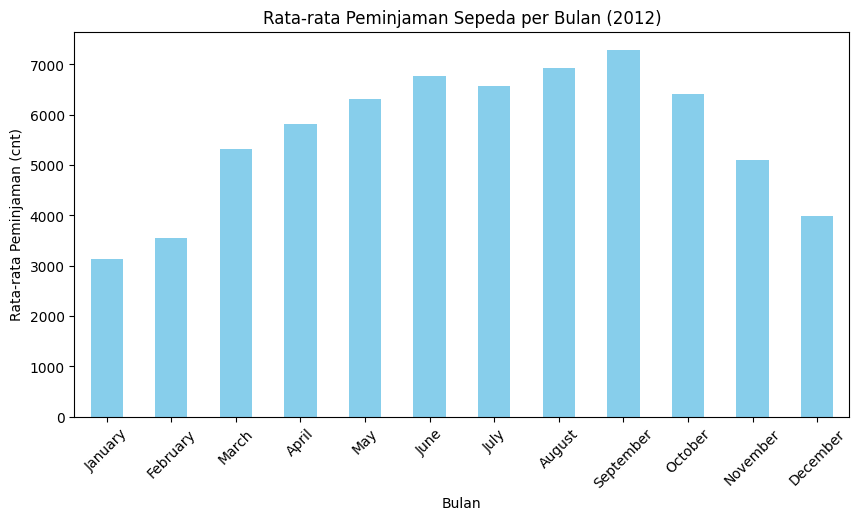

In [66]:
month_map = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

# Tambahkan kolom nama bulan
bike_day_df["month_name"] = bike_day_df["mnth"].map(month_map)

# Tambahkan kolom year supaya lebih jelas
bike_day_df["year"] = bike_day_df["yr"].map({0: 2011, 1: 2012})

# Filter data tahun 2012
bike_2012 = bike_day_df[bike_day_df["year"] == 2012]

# Line plot tren harian
plt.figure(figsize=(12,5))
plt.plot(bike_2012["dteday"], bike_2012["cnt"], color="blue")
plt.title("Tren Peminjaman Sepeda Tahun 2012")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman (cnt)")
plt.show()

# Bar chart rata-rata peminjaman per bulan
plt.figure(figsize=(10,5))
bike_2012.groupby("month_name")["cnt"].mean() \
        .reindex(month_map.values()) \
        .plot(kind="bar", color="skyblue")
plt.title("Rata-rata Peminjaman Sepeda per Bulan (2012)")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Peminjaman (cnt)")
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2: Bagaimana demografi pelanggan casual dan registered(terdaftar) pada peminjaman sepeda ini?


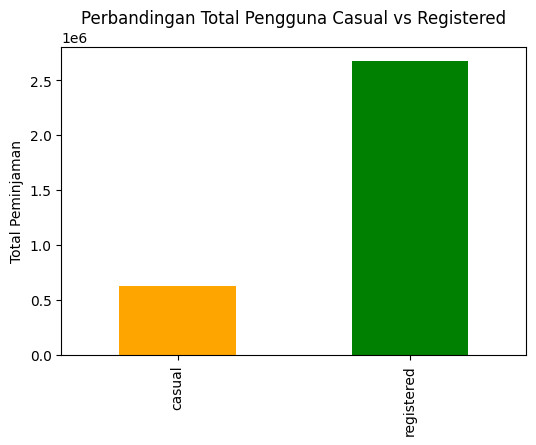

In [67]:
# Bar total peminjaman casual vs registered
plt.figure(figsize=(6,4))
bike_day_df[["casual","registered"]].sum().plot(kind="bar", color=["orange","green"])
plt.title("Perbandingan Total Pengguna Casual vs Registered")
plt.ylabel("Total Peminjaman")
plt.show()


### Pertanyaan 3: Apakah temperature(suhu) dan humidity(kelembapan) mempengaruhi peminjaman sepeda?


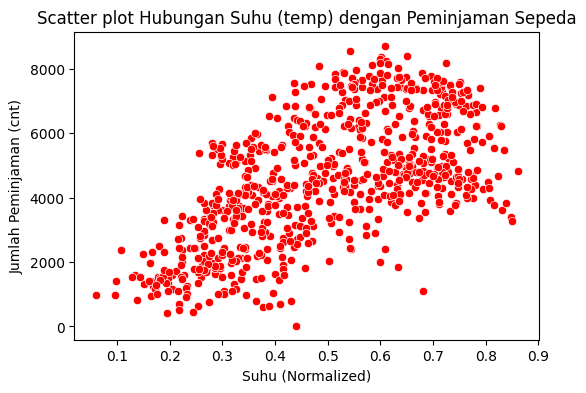

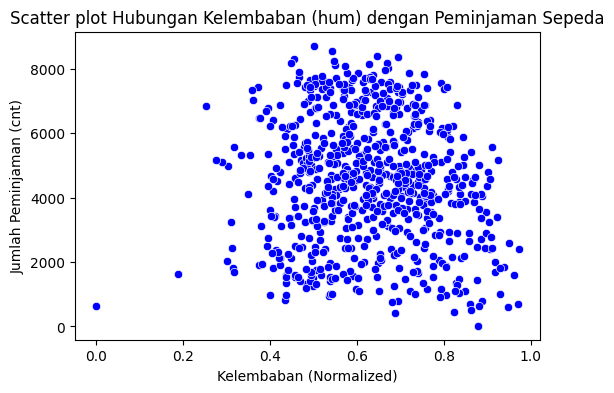

In [68]:
# Scatter hubungan suhu dan peminjaman
plt.figure(figsize=(6,4))
sns.scatterplot(data=bike_day_df, x="temp", y="cnt", color="red")
plt.title("Scatter plot Hubungan Suhu (temp) dengan Peminjaman Sepeda")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Peminjaman (cnt)")
plt.show()

# Scatter hubungan kelembaban dan peminjaman
plt.figure(figsize=(6,4))
sns.scatterplot(data=bike_day_df, x="hum", y="cnt", color="blue")
plt.title("Scatter plot Hubungan Kelembaban (hum) dengan Peminjaman Sepeda")
plt.xlabel("Kelembaban (Normalized)")
plt.ylabel("Jumlah Peminjaman (cnt)")
plt.show()


**Insight:**
- Line chart untuk menunjukan tren peminjaman per hari pada tahun 2012 selanjutnya bar chart pertama menunjukan rata rata peminjaman sepeda pada tiap bulan pada tahun 2012
- Bar chart kedua  menunjukan perbandingan total antara oengguna casual dan registered
- Scatter plot menunjukan hubugan suhu(temp) dan kelembapan(hum) dengan jumlah peminjaman sepeda

## Analisis Lanjutan (Opsional)

rent_level
Rendah    244
Sedang    244
Tinggi    243
Name: count, dtype: int64


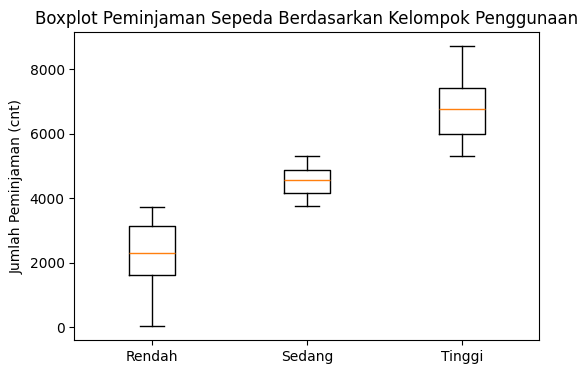

In [70]:
# Analisis lanjutan dengan Clustering Manual (Binning)

# Binning jumlah peminjaman menjadi 3 kelompok
bike_day_df["rent_level"] = pd.qcut(bike_day_df["cnt"], q=3, labels=["Rendah", "Sedang", "Tinggi"])

# Melihat distribusi kelompok
print(bike_day_df["rent_level"].value_counts())

# Groupby dengan observed=True untuk menghilangkan warning
cluster_summary = bike_day_df.groupby("rent_level", observed=True).agg({
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "rent_level": lambda x: x.mode()[0]
})

# Visualisasi Boxplot per Kelompok
plt.figure(figsize=(6,4))
plt.boxplot([
    bike_day_df[bike_day_df["rent_level"]=="Rendah"]["cnt"],
    bike_day_df[bike_day_df["rent_level"]=="Sedang"]["cnt"],
    bike_day_df[bike_day_df["rent_level"]=="Tinggi"]["cnt"]
])
plt.xticks([1,2,3], ["Rendah", "Sedang", "Tinggi"])
plt.title("Boxplot Peminjaman Sepeda Berdasarkan Kelompok Penggunaan")
plt.ylabel("Jumlah Peminjaman (cnt)")
plt.show()


## Conclusion

- Conclution pertanyaan 1: peminjaman sepeda mencapai rata rata nilai tertinggi pada bulan september 2012 dengan jumlah rata rata 7285.8
- Conclution pertanyaan 2: peminjaman sepeda oleh pengguna casual dan registered menunjukan perbedaan yang besar. dimana pengguna registered total peminjamannya di sekitar 2.700.000an sedangkan casual di sekitar 600.000an
- Conclution pertanyaan 3: suhu mempengaruhi peminjaman sepeda yang dimana 0.5 samapi 0.7 semakin banyak peminjaman sepeda
